https://drive.google.com/file/d/17MThIoNJgHj_iPERowrUKzqxkLsAwDjZ/view

- columns transform was learnt from sklearn official site
- https://scikit-learn.org/stable/auto_examples/compose/plot_column_transformer_mixed_types.html


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#data.to_csv("titanic.csv", index=False)

In [3]:
data=pd.read_csv("titanic.csv")

In [4]:
#
data=data.drop(['PassengerId','Name','Ticket','Cabin'], axis=1)
data.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C


In [5]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# 177 values for age is missing

<AxesSubplot:xlabel='Sex', ylabel='count'>

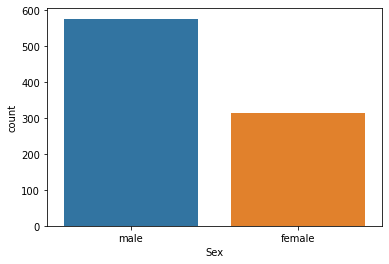

In [7]:
sns.countplot(data['Sex'])

In [8]:
x=data.drop('Survived', axis=1)
y=data[['Survived']]

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2) 

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(712, 7)
(712, 1)
(179, 7)
(179, 1)


In [10]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
x.head(2)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C


In [11]:
from sklearn.tree import DecisionTreeClassifier

In [22]:

numeric_features=['Pclass','Age','SibSp','Parch','Fare']
numeric_transformer=Pipeline([
    ('impute',SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features=['Sex','Embarked']
categorical_transformer=OneHotEncoder()

preprocessor=ColumnTransformer(
    transformers=[
        ('num', numeric_transformer,numeric_features),
        ('cat',categorical_transformer, categorical_features)])

preprocessor
clf=Pipeline([
    ("preprocessor",preprocessor),
    ("Dtree", DecisionTreeClassifier(criterion='gini',max_depth=7))])

In [23]:
clf.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Pclass', 'Age', 'SibSp',
                                                   'Parch', 'Fare']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Sex', 'Embarked'])])),
                ('Dtree', DecisionTreeClassifier(max_depth=7))])

In [24]:
y_pred=clf.predict(x_test)

In [15]:
from sklearn.metrics import classification_report

con_mat=classification_report(y_test, y_pred)

print(con_mat)

              precision    recall  f1-score   support

           0       0.90      0.87      0.88       121
           1       0.74      0.79      0.77        58

    accuracy                           0.84       179
   macro avg       0.82      0.83      0.82       179
weighted avg       0.85      0.84      0.84       179



In [25]:
# max depth=7
con_mat=classification_report(y_test, y_pred)

print(con_mat)

              precision    recall  f1-score   support

           0       0.85      0.93      0.89       121
           1       0.81      0.67      0.74        58

    accuracy                           0.84       179
   macro avg       0.83      0.80      0.81       179
weighted avg       0.84      0.84      0.84       179



In [16]:
"""
import joblib
joblib.dump(clf,'dtree.pkl')
"""

['dtree.pkl']

In [26]:
clf.named_steps

{'preprocessor': ColumnTransformer(transformers=[('num',
                                  Pipeline(steps=[('impute',
                                                   SimpleImputer(strategy='median')),
                                                  ('scaler', StandardScaler())]),
                                  ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']),
                                 ('cat', OneHotEncoder(), ['Sex', 'Embarked'])]),
 'Dtree': DecisionTreeClassifier(max_depth=7)}

[Text(0.49599358974358976, 0.9375, 'X[5] <= 0.5\ngini = 0.48\nsamples = 712\nvalue = [428, 284]'),
 Text(0.27724358974358976, 0.8125, 'X[4] <= -0.099\ngini = 0.323\nsamples = 459\nvalue = [366, 93]'),
 Text(0.09615384615384616, 0.6875, 'X[1] <= -1.206\ngini = 0.229\nsamples = 333\nvalue = [289, 44]'),
 Text(0.03205128205128205, 0.5625, 'X[2] <= 1.322\ngini = 0.165\nsamples = 11\nvalue = [1, 10]'),
 Text(0.019230769230769232, 0.4375, 'gini = 0.0\nsamples = 10\nvalue = [0, 10]'),
 Text(0.04487179487179487, 0.4375, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.16025641025641027, 0.5625, 'X[7] <= 0.5\ngini = 0.189\nsamples = 322\nvalue = [288, 34]'),
 Text(0.07051282051282051, 0.4375, 'X[4] <= -0.499\ngini = 0.166\nsamples = 285\nvalue = [259, 26]'),
 Text(0.02564102564102564, 0.3125, 'X[1] <= -0.411\ngini = 0.094\nsamples = 122\nvalue = [116, 6]'),
 Text(0.01282051282051282, 0.1875, 'gini = 0.0\nsamples = 34\nvalue = [34, 0]'),
 Text(0.038461538461538464, 0.1875, 'X[1] <= -0.183\ngi

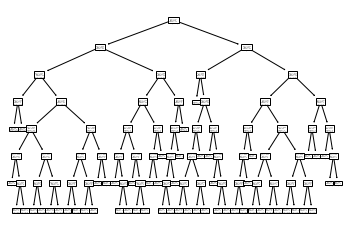

In [27]:
from sklearn.tree import plot_tree
plot_tree(clf['Dtree'])